# Batch and Stochastic Training

This python function illustrates two different training methods: batch and stochastic training.  For each model, we will use a regression model that predicts one model variable.

We start by loading the necessary libraries and resetting the computational graph.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# from tensorflow.python.framework import ops
tf.reset_default_graph()

We start a computational graph session.

In [3]:
sess = tf.Session()

# Stochastic Training

----------------------

### Generate Data

The data we will create is 100 random samples from a `Normal(mean = 1, sd = 0.1)`.  The target will be an array of size 100 filled with the constant 10.0.

We also create the necessary placeholders in the graph for the data and target.  Note that we use a shape of `[1]` for stochastic training.

In [4]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

### Model Variables and Operations

We create the one variable in the graph, `A`.  We then create the model operation, which is just the multiplication of the input data and `A`.

In [5]:
# Create variable (one model parameter = A)
# A = tf.Variable(tf.random_normal(shape=[1]))
A = tf.get_variable(
    'A', shape=[1], initializer=tf.initializers.random_normal())
# Add operation to graph
my_output = tf.multiply(x_data, A)

### Loss Function

For this, we choose the L2 loss.  We can easily choose the L1 loss by replacing `tf.square()` with `tf.abs()`.

In [6]:
# Add L2 loss operation to graph
# loss = tf.square(my_output - y_target)
loss = tf.losses.mean_squared_error(labels=y_target, predictions=my_output)

### Optimization and Initialization

For the optimization function, we will choose the standard Gradient Descent Algorithm with a learning rate of `0.02`.  We also add and run a variable initialization operation.

In [7]:
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

### Train Model

We run the training step for 100 iterations and print off the value of `A` and the loss every 5 iterations.

In [8]:
loss_stochastic = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [1.4848921]
Loss = 77.40815
Step #10 A = [3.0281754]
Loss = 51.877
Step #15 A = [4.3059816]
Loss = 24.302114
Step #20 A = [5.3374825]
Loss = 15.56773
Step #25 A = [6.2012286]
Loss = 14.790577
Step #30 A = [6.8133574]
Loss = 4.2196364
Step #35 A = [7.4025617]
Loss = 3.2398016
Step #40 A = [7.87784]
Loss = 4.7020984
Step #45 A = [8.319753]
Loss = 9.859465
Step #50 A = [8.597584]
Loss = 0.41117787
Step #55 A = [8.801359]
Loss = 0.66968083
Step #60 A = [9.10716]
Loss = 2.1827948
Step #65 A = [9.294029]
Loss = 3.2777967
Step #70 A = [9.406228]
Loss = 0.9045139
Step #75 A = [9.42186]
Loss = 0.47250152
Step #80 A = [9.650584]
Loss = 2.677612
Step #85 A = [9.605762]
Loss = 0.373925
Step #90 A = [9.693031]
Loss = 2.7523046
Step #95 A = [10.003536]
Loss = 5.1559396
Step #100 A = [10.105362]
Loss = 0.22365913


# Batch Training

------------------

We start by resetting the computational graph

In [16]:
# Batch Training:
# Re-initialize graph
tf.reset_default_graph()
sess = tf.Session()

For Batch training, we need to declare our batch size. The larger the batch size, the smoother the convergence will be towards the optimal value.  But if the batch size is too large, the optimization algorithm may get stuck in a local minimum, where a more stochastic convergence may jump out.

Here, the we may change the batch size from 1 to 100 to see the effects of the batch size on the convergence plots at the end.

In [17]:
# Declare batch size
batch_size = 20

### Generate the Data

The data we will create is 100 random samples from a `Normal(mean = 1, sd = 0.1)`.  The target will be an array of size 100 filled with the constant 10.0.

We also create the necessary placeholders in the graph for the data and target.

Note that here, our placeholders have shape `[None, 1]`, where the batch size will take the place of the `None` dimension.

In [18]:
# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

### Model Variables and Operations

We create the one variable in the graph, `A`.  We then create the model operation, which is just the multiplication of the input data and `A`.

In [19]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1,1]))  # Also shape=[1, ] is corect

# Add operation to graph
my_output = tf.matmul(x_data, A)

### Loss Function

For this, we choose the L2 loss.  We can easily choose the L1 loss by replacing `tf.square()` with `tf.abs()`.

In [20]:
# Add L2 loss operation to graph
# loss = tf.reduce_mean(tf.square(my_output - y_target))
loss = tf.losses.mean_squared_error(labels=y_target, predictions=my_output)

### Optimization and Initialization

For the optimization function, we will choose the standard Gradient Descent Algorithm with a learning rate of `0.02`.  We also add and run a variable initialization operation.

In [21]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

### Train Model

We run the training step for 100 iterations and print off the value of `A` and the loss every 5 iterations.

Note that here we select a batch of data instead of just one data point.

In [22]:
np.random.choice(10, size=10)

array([3, 4, 2, 8, 4, 9, 7, 0, 6, 9])

In [23]:
loss_batch = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])  # reshape shape=[num_datas, num_dims]
    rand_y = np.transpose([y_vals[rand_index]])  # shape=[batch_size, 1]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[0.12893292]]
Loss = 97.43217
Step #10 A = [[1.9419109]]
Loss = 65.19212
Step #15 A = [[3.4324226]]
Loss = 42.928963
Step #20 A = [[4.6379223]]
Loss = 28.442524
Step #25 A = [[5.622155]]
Loss = 19.96471
Step #30 A = [[6.408421]]
Loss = 11.802405
Step #35 A = [[7.063658]]
Loss = 10.144535
Step #40 A = [[7.5528173]]
Loss = 6.9178057
Step #45 A = [[7.9620647]]
Loss = 5.3321776
Step #50 A = [[8.304963]]
Loss = 3.7597408
Step #55 A = [[8.593433]]
Loss = 2.8214068
Step #60 A = [[8.82241]]
Loss = 2.0680625
Step #65 A = [[8.995701]]
Loss = 1.0392
Step #70 A = [[9.136556]]
Loss = 1.1880152
Step #75 A = [[9.274328]]
Loss = 1.604089
Step #80 A = [[9.394149]]
Loss = 1.3998432
Step #85 A = [[9.484214]]
Loss = 1.5744002
Step #90 A = [[9.562297]]
Loss = 1.3748153
Step #95 A = [[9.585502]]
Loss = 1.2949637
Step #100 A = [[9.658532]]
Loss = 1.3510842


In [25]:
loss = tf.losses.mean_squared_error(labels=y_target, predictions=x_data)

In [26]:
sess.run(
    loss,
    feed_dict={
        x_data: np.arange(20).reshape(20, 1),
        y_target: np.arange(20).reshape(20, 1) + 1
    })

1.0

# Plot Stochastic vs Batch Training

Here is the matplotlib code to plot the loss for each.

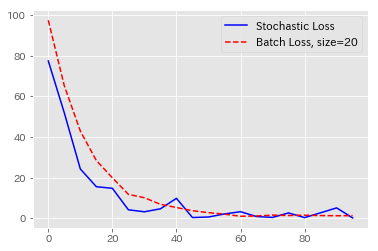

In [27]:
plt.style.use("ggplot")
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()